# Diabetes Prediction with Logistic Regression

In [259]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

## Helper Functions

In [260]:
# Cost Function
def cost(X, Y, W):
    h = 1 / (1 + np.exp(-np.dot(X, W))) # hypothesis representation
    cost = np.dot(Y, -np.log(h)) + np.dot((1-Y), np.log(1-h)) # cost function
    J = -1 / (len(X)) * np.sum(cost) # mean cost
    return J

In [261]:

def gradient(X, Y, W):
    h = 1 / (1 + np.exp(-np.dot(X, W)))
    diff = h - Y
    grad = 1 / (len(X)) * np.dot(diff, X)
    return grad

In [262]:
# Dataset from: https://www.kaggle.com/datasets/kandij/diabetes-dataset

def createData(fName):
    file = open(fName, 'rb')
    data = np.loadtxt(file, delimiter=",", skiprows=1)
    X = data[:, 0:8]
    Y = data[:, 8] # outcome column is label
    return X, Y

In [263]:
def splitData(split, cols, filename):
    X, Y = createData(filename)
    # Split into train and test
    X_train = X[:int(split*len(X)), cols]
    X_test = X[int(split*len(X)):, cols]
    Y_train = Y[:int(split*len(Y))]
    Y_test = Y[int(split*len(Y)):]

    # Normalize input data
    X_train = (X_train - np.mean(X_train, axis = 0)) / np.std(X_train, axis = 0)
    X_test = (X_test - np.mean(X_test, axis = 0)) / np.std(X_test, axis = 0)

    # Add bias as first column
    X_train = np.c_[np.ones(X_train.shape[0]), X_train] 
    X_test = np.c_[np.ones(X_test.shape[0]), X_test]
    return X_train, X_test, Y_train, Y_test

In [264]:
def descent(X_train, Y_train, lr = 0.001):
    weights = [0]*(len(X_train[0]))
    loss = []
    loss.append(cost(X_train, Y_train, weights))
    count = 0
    while count < 10000:
        grad = gradient(X_train, Y_train, weights)
        weights = weights - lr*grad
        loss.append(cost(X_train, Y_train, weights))
        count += 1
    """
    # Plot graph of cost vs iteration as weights are changed
    fig = plt.figure()
    ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
    ax.plot(np.arange(len(loss)), loss, "b-", label="cost")

    ax.set_title("Cost at weights are changed")
    ax.set_xlabel("iteration")
    ax.set_ylabel("Costs")
    ax.legend()
    plt.show()
    """

    print("Final weights: ", weights)
    print("Final cost: ", loss[-1])
    print("Training Accuracy: ", accuracy(X_train, Y_train, weights))
    
    
    return weights

In [265]:
def accuracy(X, Y, W):
    h = 1 / (1 + np.exp(-np.dot(X, W)))
    y_pred = np.around(h)
    pMask = Y == y_pred # create mask for values where predicted is correct
    acc = sum(pMask) / len(pMask)
    return acc


In [266]:
def scatterplot(X_test, Y_test, W, feature1, feature2):
    y_pred = np.around(1 / (1 + np.exp(-np.dot(X_test, W))))

    # make scatterplots
    fig, axs = plt.subplots(1, 2)
    plt.subplots_adjust(wspace = 0.5)

    y1 = (-W[0] - W[1]*X_test[-1, 1])/W[2]
    y2 = (-W[0] - W[1]*X_test[0,1])/W[2]
    plt.axline((X_test[-1, 1], y1), (X_test[0, 1], y2), color = "black")
    plt.ylim(np.amin(X_test[:, 2], axis = 0), np.amax(X_test[:, 2], axis = 0))
    
    plt.suptitle(feature1 + " and " + feature2 + " Model")

    axs[0].scatter(X_test[:, 1], X_test[:, 2], c=Y_test)
    axs[0].set_title("Observed Diabetes")
    axs[0].set_ylabel("Normalized " + feature2)
    axs[0].set_xlabel("Normalized " + feature1)
    axs[0].set_ylim(np.amin(X_test[:, 2], axis = 0) - 0.2, np.amax(X_test[:, 2], axis = 0) + 0.2)

    axs[1].scatter(X_test[:, 1], X_test[:, 2], c=y_pred)
    axs[1].set_title("Predicted Diabetes")
    axs[1].set_ylabel("Normalized " + feature2)
    axs[1].set_xlabel("Normalized " + feature1)
    axs[1].set_ylim(np.amin(X_test[:, 2], axis = 0) - 0.2, np.amax(X_test[:, 2], axis = 0) + 0.2)

    plt.show()

## Model Creation
### 8-dimensional model

In [267]:
filename = "diabetes2.csv"
sr = 0.75

X_train, X_test, Y_train, Y_test = splitData(sr, (0,1,2,3,4,5,6,7), filename)
W = descent(X_train, Y_train)
print("Testing Accuracy: ", accuracy(X_test, Y_test, W))


Final weights:  [-0.66405417  0.30734772  0.71401776 -0.11287652 -0.00607035  0.03314956
  0.52259872  0.2591092   0.16235891]
Final cost:  -0.0017505502766420476
Training Accuracy:  0.7673611111111112
Testing Accuracy:  0.78125


### 6-dimensional model

Final weights:  [-0.66434199  0.30362071  0.73030187 -0.10865401  0.53167357  0.26736186
  0.15678175]
Final cost:  -0.0014675424264386629
Training Accuracy:  0.7708333333333334
Testing Accuracy:  0.7864583333333334


Text(0.5, 0, 'Input Features')

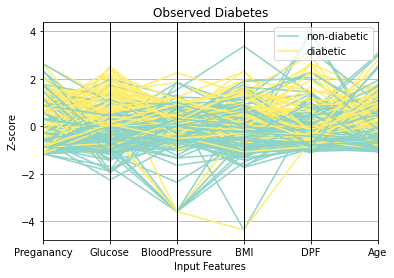

In [268]:
X_train, X_test, Y_train, Y_test = splitData(sr, (0,1,2,5,6,7), filename)
W = descent(X_train, Y_train)
print("Testing Accuracy: ", accuracy(X_test, Y_test, W))

labels = ["Preganancy", "Glucose", "BloodPressure", "BMI","DPF","Age"]
df = pd.DataFrame(X_test[:, 1:], columns = labels)
outcome = np.copy(Y_test).astype(np.str_)
maskY = (outcome == "1.0")
outcome[(maskY)] = "diabetic"
maskN = (outcome == "0.0")
outcome[(maskN)] = "non-diabetic"
df["Outcome"] = outcome
pd.plotting.parallel_coordinates(df, 'Outcome',colormap=plt.get_cmap("Set3"))
plt.title("Observed Diabetes")
plt.ylabel("Z-score")
plt.xlabel("Input Features")



### Permutation Test

In [ ]:
# Shuffle each column of X_test to create permutation
def create_permutation(X):
    new_X = X[:, 1]
    np.random.shuffle(new_X)
    for i in range(2, len(X[0])):
        randCol = X[:, i]
        np.random.shuffle(randCol)
        new_X = np.concatenate((new_X, randCol), axis=0)
    new_X = new_X.reshape(len(X), len(X[0]) - 1)
    return new_X

In [ ]:
# Find p value
def findP(t, arr):
    count = 0
    while count < len(arr) and arr[count] > t:
        print(arr[count])
        count += 1
    p = count / len(arr)
    return p


In [ ]:
# Take 10000 resamples
acc = []
test_acc = accuracy(X_test, Y_test, W) * 100
X_c = np.copy(X_test)
for i in range(5000):
    new_X = create_permutation(X_c)
    ones = np.ones(len(new_X))
    ones = ones.reshape(len(ones), 1)
    new_X = np.concatenate((ones, new_X), axis=1)
    a = accuracy(new_X, Y_test, W) * 100
    acc.append(a)

acc = sorted(acc, reverse = True)
p_val = findP(test_acc, acc)
print(p_val)

0.0


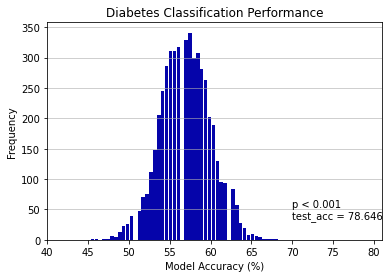

In [ ]:
n, bins, patches = plt.hist(acc, bins='auto', color='#0504aa', rwidth=0.9)
plt.grid(axis='y', alpha=0.75)
plt.xlim(round(min(acc)) - 5, round(test_acc) + 2)
plt.xlabel('Model Accuracy (%)')
plt.ylabel('Frequency')
plt.title('Diabetes Classification Performance')

if p_val < 0.001:
    pstr = "p < 0.001"
else:
    pstr = "p = " + str(p_val)
plt.text(70, 35, pstr + "\n" + "test_acc = " + str(round(test_acc, 3)))
plt.show()

### Glucose Comparison

Final weights:  [-0.65005931  0.79928399  0.52493328]
Final cost:  -0.013031372492764523
Training Accuracy:  0.7569444444444444
Test Accuracy:  0.7604166666666666


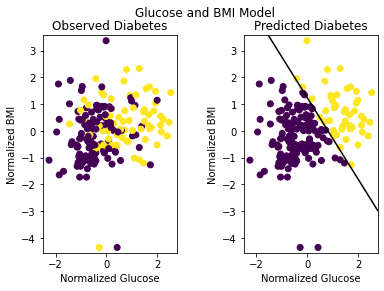

In [269]:
# Glucose, BMI
cols = (1, 5)
X_train, X_test, Y_train, Y_test = splitData(sr, cols, filename)
W = descent(X_train, Y_train)
print("Test Accuracy: ", accuracy(X_test, Y_test, W))
scatterplot(X_test, Y_test, W, "Glucose", "BMI")


Final weights:  [-0.63617686  0.8349525   0.34142828]
Final cost:  -0.022706312975639024
Training Accuracy:  0.7361111111111112
Test Accuracy:  0.7708333333333334


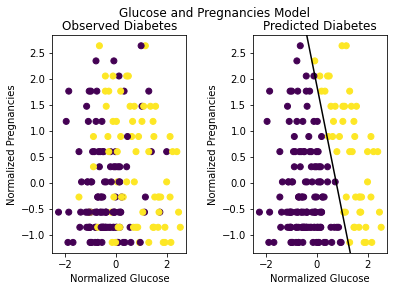

In [270]:
# Glucose, Pregnancies
cols = (1, 0)
X_train, X_test, Y_train, Y_test = splitData(sr, cols, filename)
W = descent(X_train, Y_train)
print("Test Accuracy: ", accuracy(X_test, Y_test, W))
scatterplot(X_test, Y_test, W, "Glucose", "Pregnancies")

Final weights:  [-0.63104608  0.84221055  0.27509572]
Final cost:  -0.02408674110918849
Training Accuracy:  0.7465277777777778
Test Accuracy:  0.7760416666666666


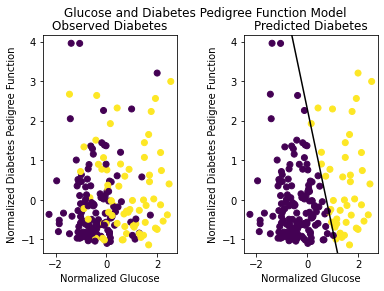

In [271]:
# Glucose, DPF
cols = (1, 6)
X_train, X_test, Y_train, Y_test = splitData(sr, cols, filename)
W = descent(X_train, Y_train)
print("Test Accuracy: ", accuracy(X_test, Y_test, W))
scatterplot(X_test, Y_test, W, "Glucose", "Diabetes Pedigree Function")

Final weights:  [-0.62254392  0.61786381  0.4043365 ]
Final cost:  -0.028591104587616968
Training Accuracy:  0.6996527777777778
Test Accuracy:  0.671875


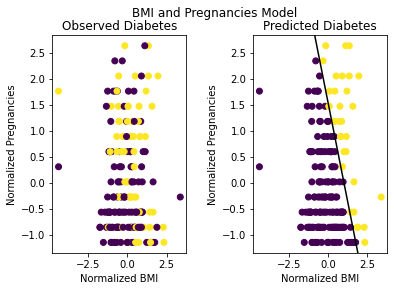

In [272]:
# BMI, Pregnancies
cols = (5, 0)
X_train, X_test, Y_train, Y_test = splitData(sr, cols, filename)
W = descent(X_train, Y_train)
print("Test Accuracy: ", accuracy(X_test, Y_test, W))
scatterplot(X_test, Y_test, W, "BMI", "Pregnancies")